## Confidence Interval Case Studies


This notebook demonstrates the three case studies from Slide 9 of the Confidence Intervals presentation:
1. Clinical Trial (continuous outcome)
2. Election Polling (proportions)
3. Manufacturing Quality Control


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Blues_r")

# Set random seed for reproducibility
np.random.seed(42)


### Helper functions

In [5]:
# Create a function to calculate confidence interval for a mean
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2, n-1)
    return mean, mean - h, mean + h

# Create a function to calculate confidence interval for a proportion using normal approximation
def proportion_ci_normal(p_hat, n, confidence=0.95):
    z = stats.norm.ppf((1 + confidence) / 2)
    margin_error = z * np.sqrt((p_hat * (1 - p_hat)) / n)
    return p_hat - margin_error, p_hat + margin_error

# Function to visualize confidence intervals
def plot_confidence_interval(mean, lower, upper, color='blue', label=None):
    plt.scatter(mean, 0, color=color, s=40, zorder=2)
    plt.plot([lower, upper], [0, 0], color=color, linewidth=2, zorder=1, label=label)
    plt.plot([lower, lower], [-0.1, 0.1], color=color, linewidth=2, zorder=1)
    plt.plot([upper, upper], [-0.1, 0.1], color=color, linewidth=2, zorder=1)


# ============================================================================
## Case Study 1: Clinical Trial (continuous outcome)
# ============================================================================


In [6]:
# Simulate clinical trial data
print("Study Details:")
print("- New drug to reduce blood pressure")
mean_reduction = 12.5
std_dev = 4.8
sample_size = 120
print(f"- Sample size: {sample_size} patients")
print(f"- Mean reduction: {mean_reduction} mmHg")
print(f"- Standard deviation: {std_dev} mmHg")


Study Details:
- New drug to reduce blood pressure
- Sample size: 120 patients
- Mean reduction: 12.5 mmHg
- Standard deviation: 4.8 mmHg


In [7]:
# Generate simulated blood pressure reduction data
bp_data = np.random.normal(mean_reduction, std_dev, sample_size)

In [ ]:
# Calculate 95% confidence interval
sample_mean = np.mean(bp_data)
sample_std = np.std(bp_data, ddof=1)  # Use n-1 for sample standard deviation
z_value = stats.norm.ppf(0.975)  # 97.5th percentile for 95% CI
margin_of_error = z_value * (sample_std / np.sqrt(sample_size))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print("Sample Results:")
print(f"- Sample mean reduction: {sample_mean:.2f} mmHg")
print(f"- Sample standard deviation: {sample_std:.2f} mmHg")

Sample Results:
- Sample mean reduction: 12.12 mmHg
- Sample standard deviation: 4.44 mmHg


(array([ 1.,  6., 11., 12., 29., 32., 13.,  7.,  8.,  1.]),
 array([-0.0747765 ,  2.36505736,  4.80489123,  7.24472509,  9.68455896,
        12.12439282, 14.56422668, 17.00406055, 19.44389441, 21.88372828,
        24.32356214]),
 <BarContainer object of 10 artists>)

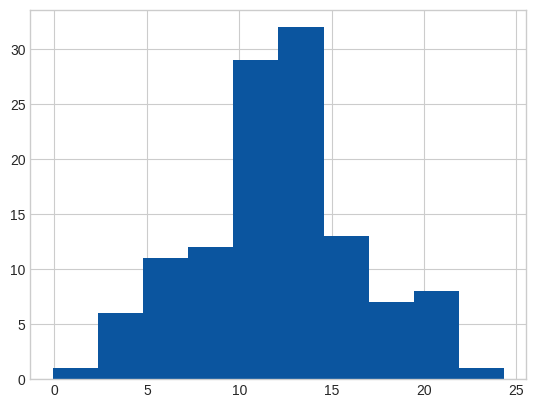

In [8]:
plt.hist(bp_data)

In [ ]:
print("95% Confidence Interval:")
print(f"{sample_mean:.2f} ± {margin_of_error:.2f} = [{ci_lower:.2f}, {ci_upper:.2f}] mmHg")

95% Confidence Interval:
12.12 ± 0.79 = [11.33, 12.91] mmHg


In [ ]:
print("Interpretation: We are 95% confident that the true mean reduction in blood pressure")
print(f"with this drug is between {ci_lower:.2f} and {ci_upper:.2f} mmHg.")

Interpretation: We are 95% confident that the true mean reduction in blood pressure
with this drug is between 11.33 and 12.91 mmHg.


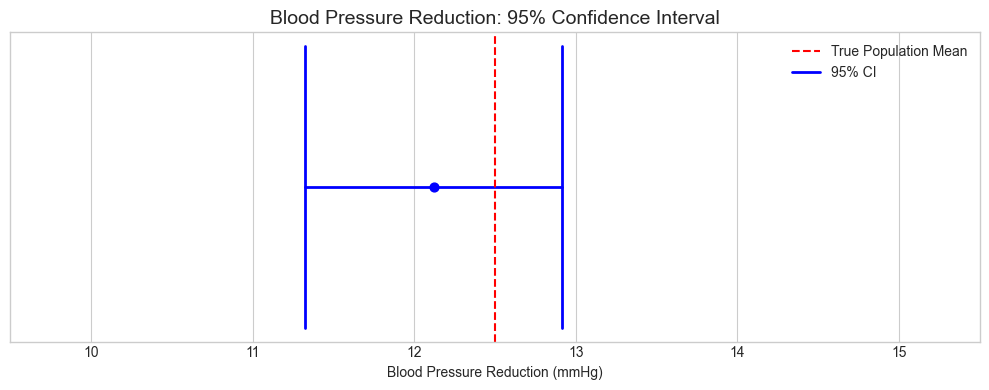

In [ ]:
# Visualize the confidence interval
plt.figure(figsize=(10, 4))
plt.title("Blood Pressure Reduction: 95% Confidence Interval", fontsize=14)
plt.axvline(x=mean_reduction, color='red', linestyle='--', label='True Population Mean')
plot_confidence_interval(sample_mean, ci_lower, ci_upper, label='95% CI')
plt.xlim(mean_reduction - 3, mean_reduction + 3)
plt.xlabel("Blood Pressure Reduction (mmHg)")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [9]:
# Demonstration of sampling distribution
num_samples = 100
sample_means = []

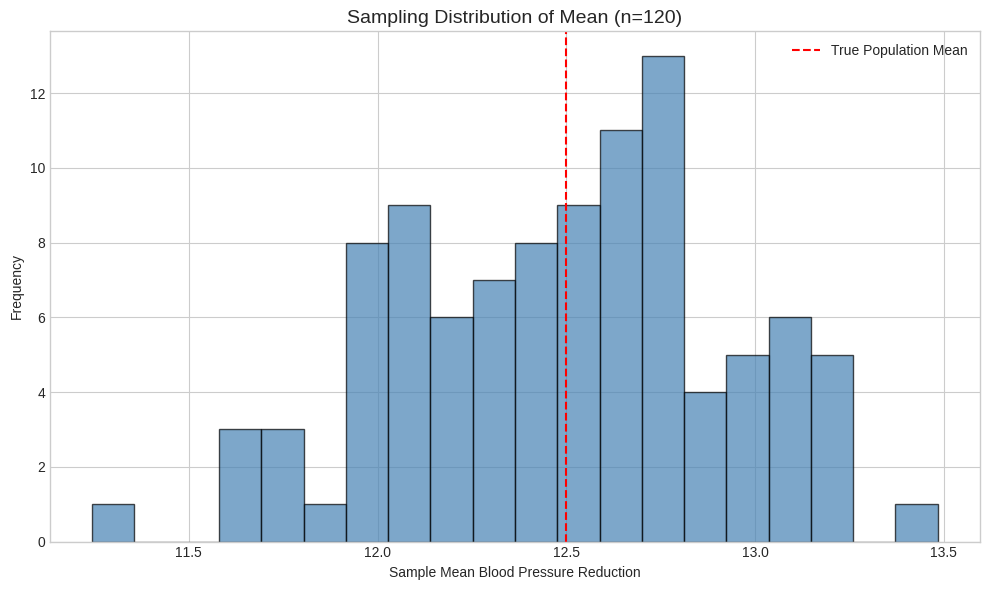

In [10]:
for _ in range(num_samples):
    sample = np.random.normal(mean_reduction, std_dev, sample_size)
    sample_means.append(np.mean(sample))

plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=20, alpha=0.7, color='steelblue', edgecolor='black')
plt.axvline(x=mean_reduction, color='red', linestyle='--', label='True Population Mean')
plt.title(f"Sampling Distribution of Mean (n={sample_size})", fontsize=14)
plt.xlabel("Sample Mean Blood Pressure Reduction")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================================
## Case Study 2: Election Polling (proportions)
# ============================================================================


In [ ]:
# Simulate election polling data
print("Study Details:")
print("- Pre-election poll for candidate support")
sample_size = 1000
true_proportion = 0.52  # 52% support
print(f"- Sample size: {sample_size} likely voters")
print(f"- Proportion supporting candidate: {true_proportion} ({true_proportion*100}%)")

Study Details:
- Pre-election poll for candidate support
- Sample size: 1000 likely voters
- Proportion supporting candidate: 0.52 (52.0%)


In [ ]:
# Generate simulated polling data
poll_data = np.random.binomial(1, true_proportion, sample_size)
p_hat = np.mean(poll_data)

In [ ]:
# Calculate 95% confidence interval using normal approximation
z_value = stats.norm.ppf(0.975)  # 97.5th percentile for 95% CI
margin_of_error = z_value * np.sqrt((p_hat * (1 - p_hat)) / sample_size)
ci_lower = max(0, p_hat - margin_of_error)  # Bound at 0
ci_upper = min(1, p_hat + margin_of_error)  # Bound at 1


print("Sample Results:")
print(f"- Sample proportion: {p_hat:.4f} ({p_hat*100:.1f}%)")

Sample Results:
- Sample proportion: 0.5180 (51.8%)


In [ ]:
print("95% Confidence Interval (Normal Approximation):")
print(f"{p_hat:.4f} ± {margin_of_error:.4f} = [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"or {p_hat*100:.1f}% ± {margin_of_error*100:.1f}% = [{ci_lower*100:.1f}%, {ci_upper*100:.1f}%]")

95% Confidence Interval (Normal Approximation):
0.5180 ± 0.0310 = [0.4870, 0.5490]
or 51.8% ± 3.1% = [48.7%, 54.9%]


### Bonus: Self Guided Research - Wilson Score Method

In [ ]:
# Also calculate using Wilson Score method (better for small samples or extreme proportions)
wilson_lower, wilson_upper = proportion_confint(np.sum(poll_data), len(poll_data), alpha=0.05, method='wilson')
print("95% Confidence Interval (Wilson Score Method):")
print(f"[{wilson_lower:.4f}, {wilson_upper:.4f}] or [{wilson_lower*100:.1f}%, {wilson_upper*100:.1f}%]")


print("Interpretation:")
if ci_lower > 0.5:
    print(f"We are 95% confident that the true proportion of voters supporting the candidate")
    print(f"is between {ci_lower*100:.1f}% and {ci_upper*100:.1f}%. Since this range is entirely")
    print(f"above 50%, we can conclude with 95% confidence that the candidate is leading.")
elif ci_upper < 0.5:
    print(f"We are 95% confident that the true proportion of voters supporting the candidate")
    print(f"is between {ci_lower*100:.1f}% and {ci_upper*100:.1f}%. Since this range is entirely")
    print(f"below 50%, we can conclude with 95% confidence that the candidate is trailing.")
else:
    print(f"We are 95% confident that the true proportion of voters supporting the candidate")
    print(f"is between {ci_lower*100:.1f}% and {ci_upper*100:.1f}%. Since this range includes 50%,")
    print(f"we cannot conclude with 95% confidence that the candidate is leading or trailing.")



95% Confidence Interval (Wilson Score Method):
[0.4870, 0.5488] or [48.7%, 54.9%]
Interpretation:
We are 95% confident that the true proportion of voters supporting the candidate
is between 48.7% and 54.9%. Since this range includes 50%,
we cannot conclude with 95% confidence that the candidate is leading or trailing.


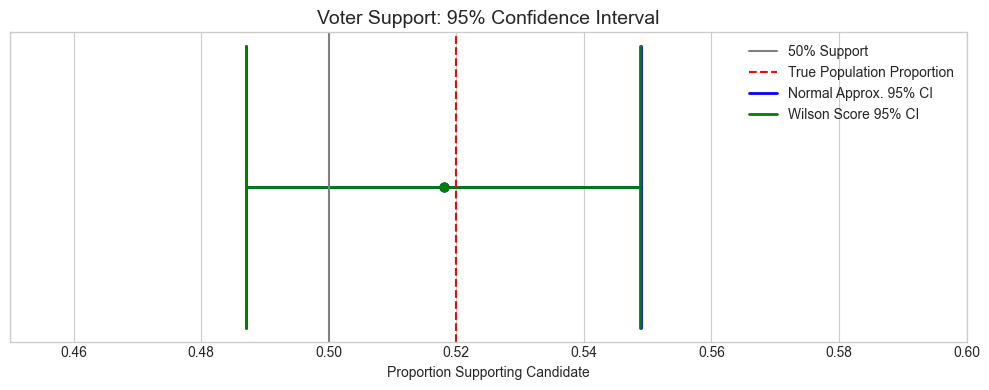

In [ ]:
# Visualize the confidence interval
plt.figure(figsize=(10, 4))
plt.title("Voter Support: 95% Confidence Interval", fontsize=14)
plt.axvline(x=0.5, color='gray', linestyle='-', label='50% Support')
plt.axvline(x=true_proportion, color='red', linestyle='--', label='True Population Proportion')
plot_confidence_interval(p_hat, ci_lower, ci_upper, label='Normal Approx. 95% CI')
plot_confidence_interval(p_hat, wilson_lower, wilson_upper, color='green', label='Wilson Score 95% CI')
plt.xlim(0.45, 0.6)
plt.xlabel("Proportion Supporting Candidate")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


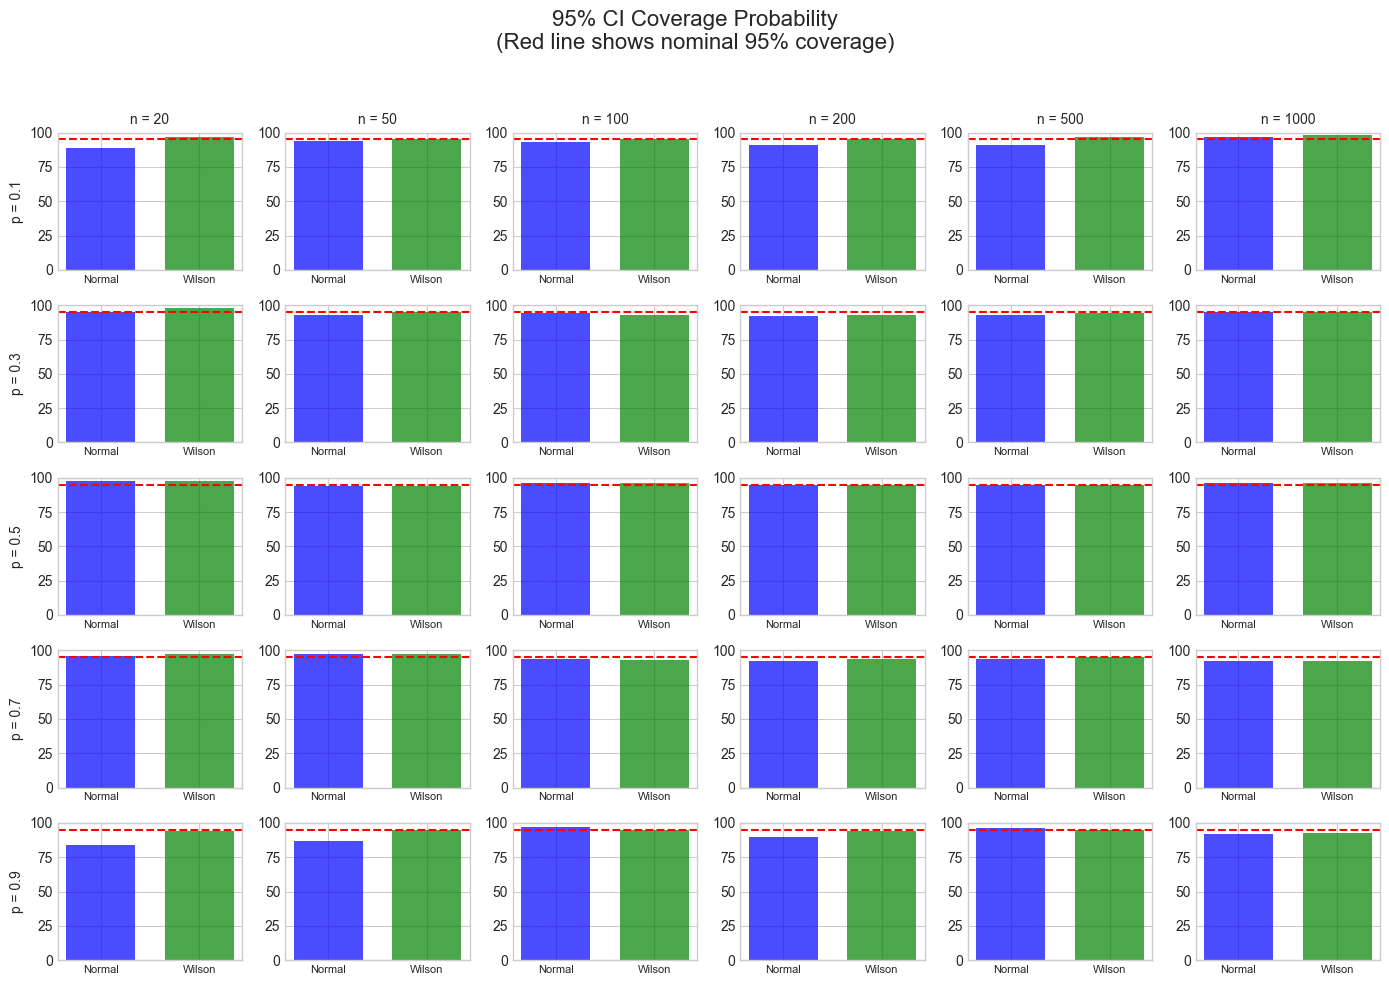

In [ ]:
# Compare normal and Wilson methods for smaller sample sizes
sample_sizes = [20, 50, 100, 200, 500, 1000]
proportions = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(14, 10))

for i, p in enumerate(proportions):
    for j, n in enumerate(sample_sizes):
        plt.subplot(len(proportions), len(sample_sizes), i*len(sample_sizes) + j + 1)

        # Generate many samples of size n
        ci_normals = []
        ci_wilsons = []
        for _ in range(100):
            sample = np.random.binomial(1, p, n)
            p_hat = np.mean(sample)

            # Normal approximation
            z = stats.norm.ppf(0.975)
            me = z * np.sqrt((p_hat * (1 - p_hat)) / n)
            ci_normals.append((max(0, p_hat - me), min(1, p_hat + me)))

            # Wilson Score
            wl, wu = proportion_confint(np.sum(sample), n, alpha=0.05, method='wilson')
            ci_wilsons.append((wl, wu))

        # Count how many CIs contain the true proportion
        normal_coverage = sum(1 for ci in ci_normals if ci[0] <= p <= ci[1])
        wilson_coverage = sum(1 for ci in ci_wilsons if ci[0] <= p <= ci[1])

        plt.bar([0, 1], [normal_coverage, wilson_coverage], width=0.7,
                color=['blue', 'green'], alpha=0.7)
        plt.ylim(0, 100)
        plt.xticks([0, 1], ['Normal', 'Wilson'], fontsize=8)
        plt.axhline(y=95, color='red', linestyle='--')

        if j == 0:
            plt.ylabel(f'p = {p}', fontsize=10)
        if i == 0:
            plt.title(f'n = {n}', fontsize=10)

plt.suptitle('95% CI Coverage Probability\n(Red line shows nominal 95% coverage)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# ============================================================================
## Case Study 3: Manufacturing Quality Control
# ============================================================================


In [ ]:
# Simulate manufacturing quality control data
print("Study Details:")
print("- Widget production process monitoring")
print("- Target diameter: 10.00 mm")
print("- Tolerance: ±0.05 mm (9.95 to 10.05 mm)")
true_mean = 10.02  # Slightly above target
std_dev = 0.03     # Standard deviation in manufacturing process
sample_size = 50   # Widgets per batch
print(f"- Sample size: {sample_size} widgets per batch")

Study Details:
- Widget production process monitoring
- Target diameter: 10.00 mm
- Tolerance: ±0.05 mm (9.95 to 10.05 mm)
- Sample size: 50 widgets per batch


In [ ]:
# Generate simulated widget diameter data
widget_data = np.random.normal(true_mean, std_dev, sample_size)

# Calculate 95% confidence interval
mean_diameter, ci_lower, ci_upper = mean_confidence_interval(widget_data, confidence=0.95)

print("Sample Results:")
print(f"- Sample mean diameter: {mean_diameter:.4f} mm")
print(f"- Sample standard deviation: {np.std(widget_data, ddof=1):.4f} mm")

Sample Results:
- Sample mean diameter: 10.0229 mm
- Sample standard deviation: 0.0336 mm


In [ ]:
print("95% Confidence Interval:")
print(f"{mean_diameter:.4f} ± {(ci_upper - mean_diameter):.4f} = [{ci_lower:.4f}, {ci_upper:.4f}] mm")

95% Confidence Interval:
10.0229 ± 0.0096 = [10.0133, 10.0325] mm


In [ ]:
# Check if process is within specification limits
spec_lower = 9.95
spec_upper = 10.05

print("Process Capability Analysis:")
cp = (spec_upper - spec_lower) / (6 * np.std(widget_data, ddof=1))
cpk = min(
    (spec_upper - mean_diameter) / (3 * np.std(widget_data, ddof=1)),
    (mean_diameter - spec_lower) / (3 * np.std(widget_data, ddof=1))
)
print(f"- Process Capability (Cp): {cp:.2f}")
print(f"- Process Capability Index (Cpk): {cpk:.2f}")

Process Capability Analysis:
- Process Capability (Cp): 0.50
- Process Capability Index (Cpk): 0.27


In [ ]:
if ci_lower >= spec_lower and ci_upper <= spec_upper:
    print("Interpretation: We are 95% confident that the true mean diameter")
    print(f"is between {ci_lower:.4f} and {ci_upper:.4f} mm, which is within specification.")
elif ci_lower < spec_lower and ci_upper > spec_lower:
    print("Interpretation: We are 95% confident that the true mean diameter")
    print(f"is between {ci_lower:.4f} and {ci_upper:.4f} mm. Since this interval overlaps")
    print("with the lower specification limit, we cannot be confident the process is in control.")
elif ci_lower < spec_upper and ci_upper > spec_upper:
    print("Interpretation: We are 95% confident that the true mean diameter")
    print(f"is between {ci_lower:.4f} and {ci_upper:.4f} mm. Since this interval overlaps")
    print("with the upper specification limit, we cannot be confident the process is in control.")
else:
    print("Interpretation: We are 95% confident that the true mean diameter")
    print(f"is between {ci_lower:.4f} and {ci_upper:.4f} mm, which is outside the specification")
    print("limits. Process adjustment is needed.")

Interpretation: We are 95% confident that the true mean diameter
is between 10.0133 and 10.0325 mm, which is within specification.


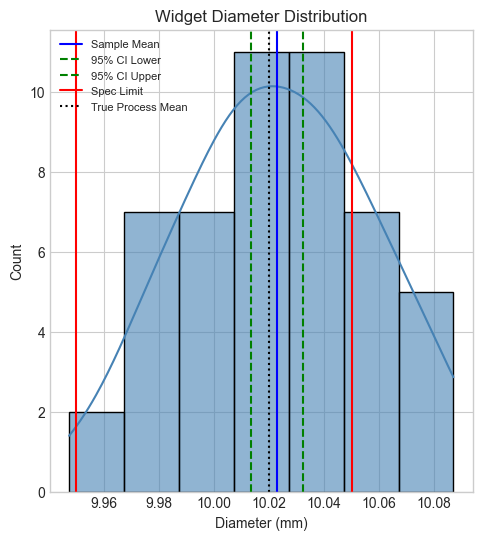

In [ ]:
# Visualize the data and confidence interval
plt.figure(figsize=(12, 6))

# Plot 1: Distribution with CI
plt.subplot(1, 2, 1)
sns.histplot(widget_data, kde=True, color='steelblue', alpha=0.6)
plt.axvline(x=mean_diameter, color='blue', linestyle='-', label='Sample Mean')
plt.axvline(x=ci_lower, color='green', linestyle='--', label='95% CI Lower')
plt.axvline(x=ci_upper, color='green', linestyle='--', label='95% CI Upper')
plt.axvline(x=spec_lower, color='red', linestyle='-', label='Spec Limit')
plt.axvline(x=spec_upper, color='red', linestyle='-')
plt.axvline(x=true_mean, color='black', linestyle=':', label='True Process Mean')
plt.title("Widget Diameter Distribution", fontsize=12)
plt.xlabel("Diameter (mm)")
plt.legend(fontsize=8)

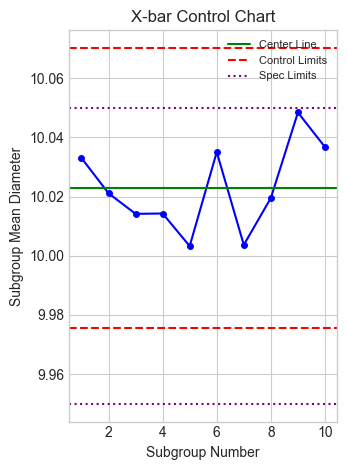

In [ ]:
# Plot 2: Control chart
plt.subplot(1, 2, 2)
subgroup_size = 5
num_subgroups = sample_size // subgroup_size
subgroup_means = [np.mean(widget_data[i*subgroup_size:(i+1)*subgroup_size]) for i in range(num_subgroups)]
subgroup_ranges = [np.max(widget_data[i*subgroup_size:(i+1)*subgroup_size]) -
                  np.min(widget_data[i*subgroup_size:(i+1)*subgroup_size]) for i in range(num_subgroups)]


# X-bar chart
plt.plot(range(1, num_subgroups+1), subgroup_means, 'bo-', markersize=4)
plt.axhline(y=np.mean(subgroup_means), color='green', linestyle='-', label='Center Line')

# Control limits (approximate based on average range)
r_bar = np.mean(subgroup_ranges)
a2 = 0.577  # Constant for n=5
ucl = np.mean(subgroup_means) + a2 * r_bar
lcl = np.mean(subgroup_means) - a2 * r_bar
plt.axhline(y=ucl, color='red', linestyle='--', label='Control Limits')
plt.axhline(y=lcl, color='red', linestyle='--')

# Specification limits
plt.axhline(y=spec_upper, color='purple', linestyle=':', label='Spec Limits')
plt.axhline(y=spec_lower, color='purple', linestyle=':')

plt.title("X-bar Control Chart", fontsize=12)
plt.xlabel("Subgroup Number")
plt.ylabel("Subgroup Mean Diameter")
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

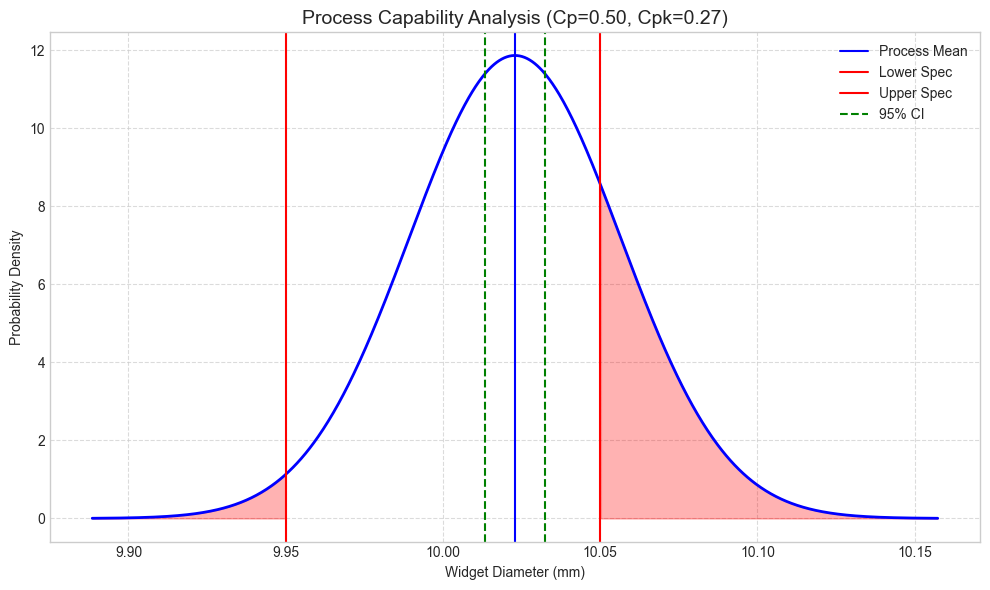

In [ ]:
# Plot capability analysis
plt.figure(figsize=(10, 6))
x = np.linspace(mean_diameter - 4*np.std(widget_data, ddof=1),
                mean_diameter + 4*np.std(widget_data, ddof=1), 1000)
y = stats.norm.pdf(x, mean_diameter, np.std(widget_data, ddof=1))

plt.plot(x, y, 'b-', linewidth=2)
plt.axvline(x=mean_diameter, color='blue', linestyle='-', label='Process Mean')
plt.axvline(x=spec_lower, color='red', linestyle='-', label='Lower Spec')
plt.axvline(x=spec_upper, color='red', linestyle='-', label='Upper Spec')
plt.axvline(x=ci_lower, color='green', linestyle='--', label='95% CI')
plt.axvline(x=ci_upper, color='green', linestyle='--')

# Fill areas outside specification
plt.fill_between(x, y, where=(x < spec_lower), color='red', alpha=0.3)
plt.fill_between(x, y, where=(x > spec_upper), color='red', alpha=0.3)

plt.title(f"Process Capability Analysis (Cp={cp:.2f}, Cpk={cpk:.2f})", fontsize=14)
plt.xlabel("Widget Diameter (mm)")
plt.ylabel("Probability Density")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Demonstrate statistical process control
# Generate data for 20 days with a shift on day 10
days = 20
widgets_per_day = 10
daily_means = []
true_means = [true_mean] * days  # Initialize with baseline mean for all days
# Apply process shift starting from day 10 (0-based index 10 means day 11)
for day in range(10, days):
    true_means[day] = true_mean + 0.02  # Process shift

daily_data = []
for day in range(days):
    day_data = np.random.normal(true_means[day], std_dev, widgets_per_day)
    daily_data.append(day_data)
    daily_means.append(np.mean(day_data))

# Calculate control limits based on first 10 days (before the shift)
baseline_days = 10
baseline_data = np.concatenate(daily_data[:baseline_days])
overall_mean = np.mean(baseline_data)
overall_sd = np.std(baseline_data, ddof=1)
control_ucl = overall_mean + 3 * overall_sd / np.sqrt(widgets_per_day)
control_lcl = overall_mean - 3 * overall_sd / np.sqrt(widgets_per_day)


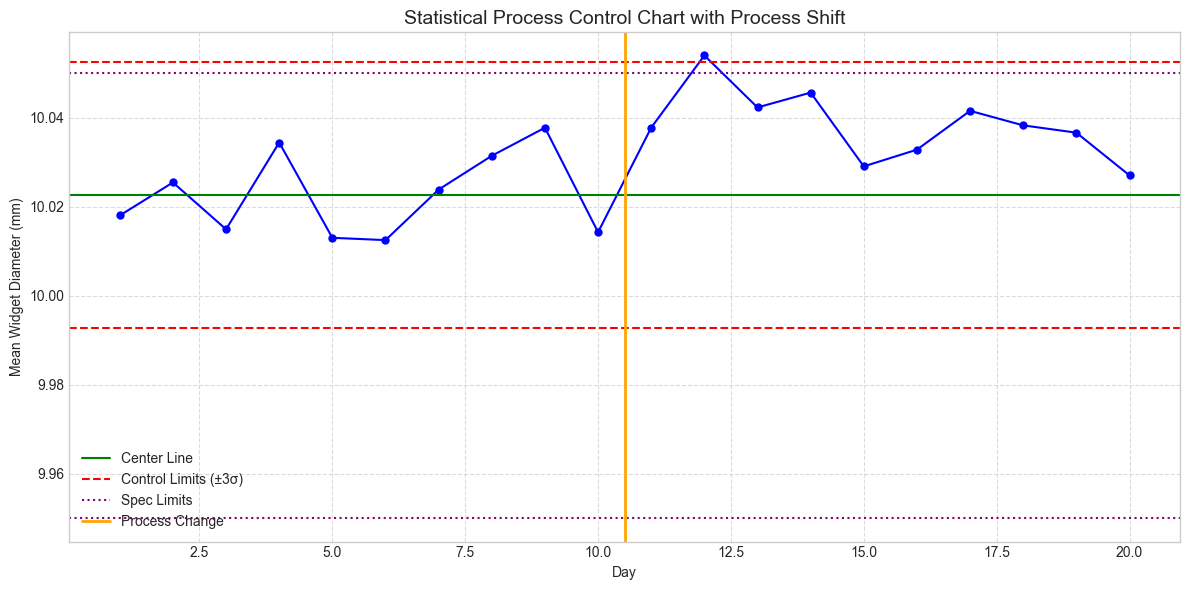

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, days+1), daily_means, 'bo-', markersize=5)
plt.axhline(y=overall_mean, color='green', linestyle='-', label='Center Line')
plt.axhline(y=control_ucl, color='red', linestyle='--', label='Control Limits (±3σ)')
plt.axhline(y=control_lcl, color='red', linestyle='--')
plt.axhline(y=spec_upper, color='purple', linestyle=':', label='Spec Limits')
plt.axhline(y=spec_lower, color='purple', linestyle=':')
plt.axvline(x=10.5, color='orange', linestyle='-', linewidth=2, label='Process Change')

plt.title("Statistical Process Control Chart with Process Shift", fontsize=14)
plt.xlabel("Day")
plt.ylabel("Mean Widget Diameter (mm)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================================
## Extra: Comparison of Methods for All Three Cases
# ============================================================================


In [ ]:
# Create a function to demonstrate CI coverage
def demonstrate_ci_coverage(true_param, sample_func, ci_func, n_samples=1000):
    contains_param = 0
    ci_widths = []

    for _ in range(n_samples):
        sample = sample_func()
        lower, upper = ci_func(sample)

        if lower <= true_param <= upper:
            contains_param += 1

        ci_widths.append(upper - lower)

    coverage = contains_param / n_samples
    avg_width = np.mean(ci_widths)

    return coverage, avg_width

print("Demonstrating 95% CI coverage probabilities with 1000 simulated samples:\n")

# Clinical Trial Case
def sample_clinical():
    return np.random.normal(mean_reduction, std_dev, sample_size)

def ci_clinical(sample):
    mean = np.mean(sample)
    se = np.std(sample, ddof=1) / np.sqrt(len(sample))
    z = stats.norm.ppf(0.975)
    return mean - z*se, mean + z*se

clinical_coverage, clinical_width = demonstrate_ci_coverage(mean_reduction, sample_clinical, ci_clinical)

# Election Polling Case
def sample_polling():
    return np.random.binomial(1, true_proportion, sample_size)

def ci_polling_normal(sample):
    p_hat = np.mean(sample)
    n = len(sample)
    z = stats.norm.ppf(0.975)
    me = z * np.sqrt((p_hat * (1 - p_hat)) / n)
    return max(0, p_hat - me), min(1, p_hat + me)

def ci_polling_wilson(sample):
    p_hat = np.mean(sample)
    n = len(sample)
    return proportion_confint(int(p_hat * n), n, alpha=0.05, method='wilson')

polling_normal_coverage, polling_normal_width = demonstrate_ci_coverage(
    true_proportion, sample_polling, ci_polling_normal)
polling_wilson_coverage, polling_wilson_width = demonstrate_ci_coverage(
    true_proportion, sample_polling, ci_polling_wilson)

# Manufacturing Case
def sample_manufacturing():
    return np.random.normal(true_mean, std_dev, sample_size)

def ci_manufacturing(sample):
    mean = np.mean(sample)
    se = np.std(sample, ddof=1) / np.sqrt(len(sample))
    z = stats.norm.ppf(0.975)
    return mean - z*se, mean + z*se

manufacturing_coverage, manufacturing_width = demonstrate_ci_coverage(true_mean, sample_manufacturing, ci_manufacturing)

Demonstrating 95% CI coverage probabilities with 1000 simulated samples:



In [ ]:

# Create results DataFrame
results = pd.DataFrame({
    'Case Study': ['Clinical Trial', 'Election Polling (Normal)',
                  'Election Polling (Wilson)', 'Manufacturing QC'],
    'True Parameter': [mean_reduction, true_proportion, true_proportion, true_mean],
    'Sample Size': [sample_size, sample_size, sample_size, sample_size],
    'Coverage Probability': [clinical_coverage, polling_normal_coverage,
                           polling_wilson_coverage, manufacturing_coverage],
    'Average CI Width': [clinical_width, polling_normal_width,
                         polling_wilson_width, manufacturing_width],
})

print(results)
print("\nNote: Ideal coverage probability should be close to 0.95 (95%)")

                  Case Study  True Parameter  Sample Size  \
0             Clinical Trial           12.50           50   
1  Election Polling (Normal)            0.52           50   
2  Election Polling (Wilson)            0.52           50   
3           Manufacturing QC           10.02           50   

   Coverage Probability  Average CI Width  
0                 0.953          0.016509  
1                 0.943          0.274271  
2                 0.942          0.264439  
3                 0.949          0.016671  

Note: Ideal coverage probability should be close to 0.95 (95%)
